In [2]:
 pip install tensorflow-datasets  

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 67.4 MB/s eta 0:00:000m eta 0:00:010:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21482 sha256=556faf9e35019721b4904de163771cdc0cdc93774e6e794c33e0f8dcb981d1ec
  Stored in directory: /home/codespace/.cache/pip/wheels/e7/e6/28/864bdfee5339dbd6ddcb5a186286a8e217648ec198bdf0097d
Successfully built promise

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 22.3 MB/s eta 0:00:00m eta 0:00:010:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 54.2 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 70.8 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip ins

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

2024-11-03 19:43:56.158576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 19:43:56.292665: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 19:43:56.460524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730663036.676808    4677 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730663036.758313    4677 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-03 19:43:57.220210: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


In [3]:
training_data = np.load('TF_intro.npz')

In [9]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - 8ms/step - loss: 26.3284
Epoch 2/100
32/32 - 0s - 927us/step - loss: 4.5008
Epoch 3/100
32/32 - 0s - 915us/step - loss: 1.4744
Epoch 4/100
32/32 - 0s - 2ms/step - loss: 0.6679
Epoch 5/100
32/32 - 0s - 2ms/step - loss: 0.4287
Epoch 6/100
32/32 - 0s - 935us/step - loss: 0.3644
Epoch 7/100
32/32 - 0s - 2ms/step - loss: 0.3532
Epoch 8/100
32/32 - 0s - 2ms/step - loss: 0.3486
Epoch 9/100
32/32 - 0s - 2ms/step - loss: 0.3486
Epoch 10/100
32/32 - 0s - 2ms/step - loss: 0.3406
Epoch 11/100
32/32 - 0s - 2ms/step - loss: 0.3455
Epoch 12/100
32/32 - 0s - 935us/step - loss: 0.3424
Epoch 13/100
32/32 - 0s - 2ms/step - loss: 0.3360
Epoch 14/100
32/32 - 0s - 913us/step - loss: 0.3498
Epoch 15/100
32/32 - 0s - 2ms/step - loss: 0.3446
Epoch 16/100
32/32 - 0s - 941us/step - loss: 0.3448
Epoch 17/100
32/32 - 0s - 2ms/step - loss: 0.3435
Epoch 18/100
32/32 - 0s - 940us/step - loss: 0.3451
Epoch 19/100
32/32 - 0s - 930us/step - loss: 0.3369
Epoch 20/100
32/32 - 0s - 922us/step - los

In [10]:
model.layers[0].get_weights()

[array([[ 1.9732101],
        [-2.9592934]], dtype=float32),
 array([5.0180306], dtype=float32)]

In [11]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9732101],
       [-2.9592934]], dtype=float32)

In [12]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0180306], dtype=float32)

In [13]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-23.4],
       [ 19.4],
       [ -5.7],
       [ 10.9],
       [-21.6],
       [ 14.9],
       [ 11.3],
       [ -1.8],
       [ 44.8],
       [ 25. ],
       [ 16.8],
       [ 14.3],
       [ -3.8],
       [-27.5],
       [  6. ],
       [ 19.1],
       [ -0.4],
       [-21.8],
       [ -0.1],
       [-13.6],
       [-25. ],
       [-28.7],
       [  2.7],
       [  3. ],
       [ 33.3],
       [ 49.5],
       [  7.2],
       [-22.3],
       [  2.7],
       [ 31.8],
       [ -4.9],
       [ 16.8],
       [ 16.8],
       [-17.7],
       [-12.2],
       [ -1.9],
       [  3.8],
       [-40.8],
       [-11.1],
       [-13.1],
       [ -5.8],
       [-25. ],
       [ 26. ],
       [ 11.8],
       [ -9.5],
       [-14.2],
       [ 29.3],
       [ -5.1],
       [ 43.5],
       [ 15.4],
       [ 19.6],
       [-34.8],
       [-10.7],
       [  2.6],
       [ 16.2],
       [-15.7],
       [-17. ],
       [ 40. ],
       [-11.8],
       [ 21.2],
       [ 21.5],
       [ 15. ],
       [

In [14]:
training_data['targets'].round(1)

array([[-24. ],
       [ 18.9],
       [ -6.1],
       [ 10.1],
       [-22.6],
       [ 14.6],
       [ 11.1],
       [ -1.3],
       [ 45.8],
       [ 25.6],
       [ 16.2],
       [ 14.5],
       [ -4.7],
       [-26.9],
       [  7. ],
       [ 19.3],
       [ -0.1],
       [-22.5],
       [  0.6],
       [-12.9],
       [-25.4],
       [-28.7],
       [  2.4],
       [  3.4],
       [ 34.1],
       [ 49.6],
       [  7.9],
       [-22.3],
       [  2.5],
       [ 32.4],
       [ -4.4],
       [ 17.4],
       [ 17.4],
       [-17.8],
       [-12.3],
       [ -1.8],
       [  3.4],
       [-41.7],
       [-11.2],
       [-13.8],
       [ -6.5],
       [-24.6],
       [ 27.1],
       [ 12.8],
       [ -9.1],
       [-14.5],
       [ 29.7],
       [ -6. ],
       [ 43.8],
       [ 14.7],
       [ 19.9],
       [-35. ],
       [-11.2],
       [  1.6],
       [ 17.2],
       [-15.6],
       [-16.6],
       [ 39.5],
       [-11.7],
       [ 21.9],
       [ 22.4],
       [ 15.2],
       [

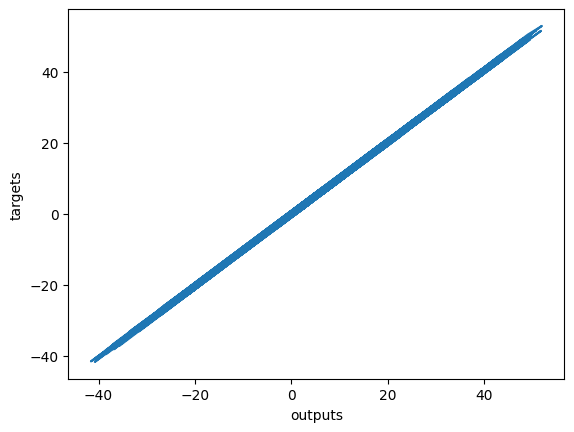

In [15]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()